In [4]:
import pandas as pd
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.Gender = df['Gender'].replace(['Male', 'Female'], [0,1])
df.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [6]:
df.tail()

,Gender,Height,Weight
8550,1,60.483946,110.565497
8551,1,63.423372,129.921671
8552,1,65.584057,155.942671
8553,1,67.429971,151.678405
8554,1,60.921791,131.253738


In [7]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Gender  Height  Weight
0      False   False   False
1      False   False   False
2      False   False   False
3      False   False   False
4      False   False   False
...      ...     ...     ...
8550   False   False   False
8551   False   False   False
8552   False   False   False
8553   False   False   False
8554   False   False   False

[8555 rows x 3 columns]>

In [8]:
df.nunique()

Gender       2
Height    8555
Weight    8555
dtype: int64

In [9]:
df = df.copy()
df2 = df.copy()

# 2. Separate X (Gender, Height) and Y (y=Weight).

In [10]:
x = df.drop('Weight', axis=1)
y = df['Weight']

# 3. Train = 70%, Test = 30%

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
print("xtrain:\n ", xtrain.head(5))
print("\n")
print("xtest: \n", xtest.head(5))

xtrain:
        Gender     Height
553        0  67.594031
1397       0  71.601697
7934       1  62.625985
8367       1  66.136131
3320       0  71.843308


xtest: 
       Gender     Height
6006       1  64.846644
1197       0  68.886367
2862       0  70.963369
6497       1  62.737189
2860       0  69.578030


# 4. Apply Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [17]:
lr.coef_

array([-19.54151693,   5.9562333 ])

In [18]:
lr.intercept_

-224.25154348584005

In [19]:
pred = lr.predict(xtest)

In [20]:
pred

array([142.44868114, 186.0517281 , 198.42283706, ..., 102.94080643,
       190.83713617, 143.34786753])

# 5. Evaluate the Model (Testing and training Accuracy, MSE for testing)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [23]:
LR_MSE = mean_squared_error(ytest, pred)
LR_MSE

96.8373443783061

In [24]:
r2s = r2_score(ytest, pred)
r2s

0.905911242442266

In [25]:
linear_train_accuracy = lr.score(xtrain, ytrain)
linear_test_accuracy = lr.score(xtest, ytest)

In [51]:
print("Linear Regression:")
print("Training Accuracy:", linear_train_accuracy)
print("Testing Accuracy:", linear_test_accuracy)
print("\nTesting Mean Squared Error:", LR_MSE)

Linear Regression:
Training Accuracy: 0.8973793060969246
Testing Accuracy: 0.905911242442266

Testing Mean Squared Error: 96.8373443783061


# 6. Apply KNN Regressor: 

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
knn = KNeighborsRegressor(n_neighbors=3)

In [29]:
knn.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=3)

In [30]:
knn_pred = knn.predict(xtest)

In [31]:
knn_train_accuracy = knn.score(xtrain, ytrain)
knn_test_accuracy = knn.score(xtest, ytest)

In [32]:
knn_MSE = mean_squared_error(ytest, knn_pred)

In [50]:
print("\nKNN Regressor:")
print("Training Accuracy:", knn_train_accuracy)
print("Testing Accuracy:", knn_test_accuracy)
print("\nTesting Mean Squared Error:", knn_MSE)


KNN Regressor:
Training Accuracy: 0.9304521916751347
Testing Accuracy: 0.8679879688589832

Testing Mean Squared Error: 135.8684592453893


In [34]:
print("\nComparison:")
print("\nLinear Regression vs. KNN Regressor:")
print("\nLinear Regression Testing Accuracy:", linear_test_accuracy)
print("KNN Regressor Testing Accuracy:", knn_test_accuracy)
print("\nLinear Regression Testing Mean Squared Error:", LR_MSE)
print("KNN Regressor Testing Mean Squared Error:", knn_MSE)


Comparison:

Linear Regression vs. KNN Regressor:

Linear Regression Testing Accuracy: 0.905911242442266
KNN Regressor Testing Accuracy: 0.8679879688589832

Linear Regression Testing Mean Squared Error: 96.8373443783061
KNN Regressor Testing Mean Squared Error: 135.8684592453893


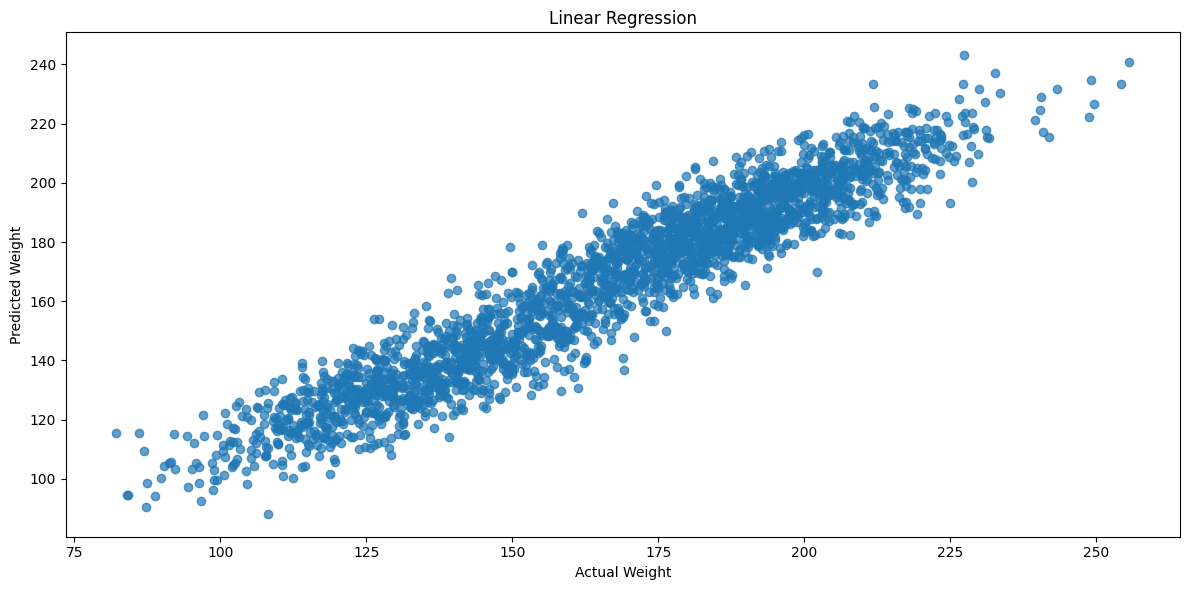

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

#plt.subplot(1, 2, 1)
plt.scatter(ytest, pred, alpha=0.7)
plt.title("Linear Regression")
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")

plt.tight_layout()

Text(0, 0.5, 'Predicted Weight')

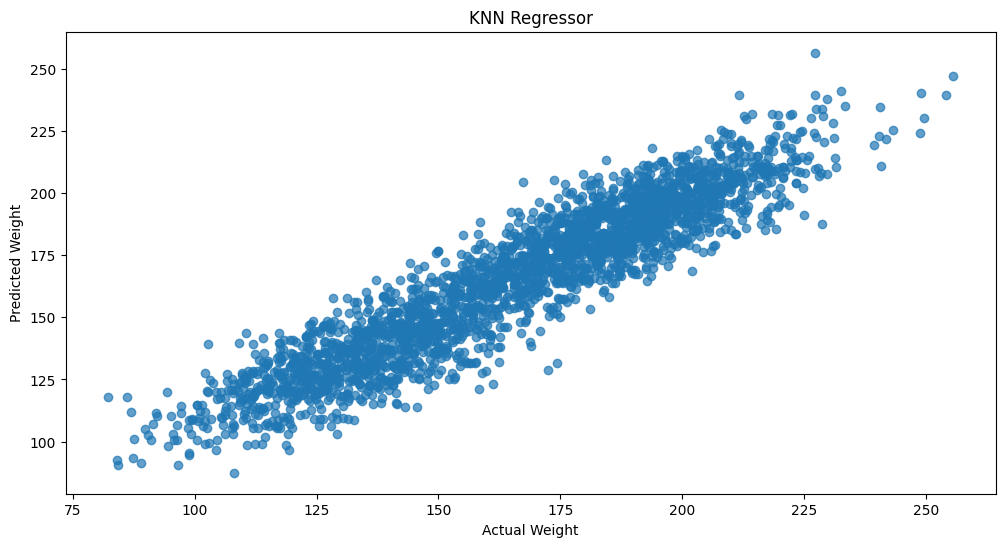

In [49]:
plt.figure(figsize=(12, 6))
#plt.subplot(1, 2, 2)
plt.scatter(ytest, knn_pred, alpha=0.7)
plt.title("KNN Regressor")
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")